# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dahlonega
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | guarapari
Processing Record 5 of Set 1 | nar'yan-mar
Processing Record 6 of Set 1 | altay
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | chaihe
Processing Record 11 of Set 1 | mahibadhoo
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | klyuchi
Processing Record 17 of Set 1 | selfoss
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | dauphin
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | grand falls-windsor
Processing Record 22 of Set 1 | yellowknife
Proces

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dahlonega,34.5326,-83.9849,27.66,89,100,2.14,US,1692670688
1,edinburgh of the seven seas,-37.0676,-12.3116,12.24,74,100,3.28,SH,1692670733
2,waitangi,-43.9535,-176.5597,8.79,88,100,4.47,NZ,1692670734
3,guarapari,-20.6667,-40.4975,22.72,89,51,2.44,BR,1692670734
4,nar'yan-mar,67.6713,53.0870,6.11,93,85,3.22,RU,1692670734


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dahlonega,34.5326,-83.9849,27.66,89,100,2.14,US,1692670688
1,edinburgh of the seven seas,-37.0676,-12.3116,12.24,74,100,3.28,SH,1692670733
2,waitangi,-43.9535,-176.5597,8.79,88,100,4.47,NZ,1692670734
3,guarapari,-20.6667,-40.4975,22.72,89,51,2.44,BR,1692670734
4,nar'yan-mar,67.6713,53.0870,6.11,93,85,3.22,RU,1692670734


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

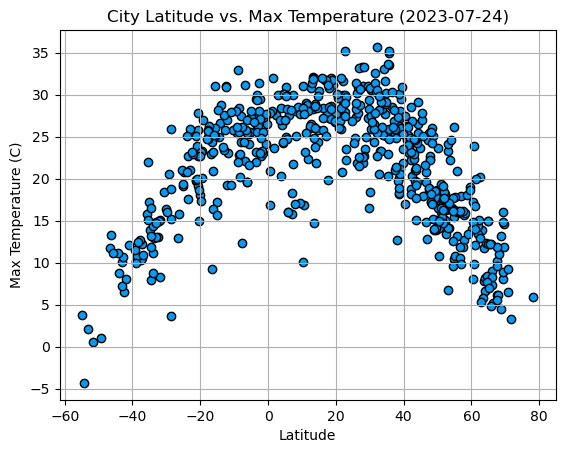

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Max Temp"], facecolors = "#069AF3", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-07-24)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

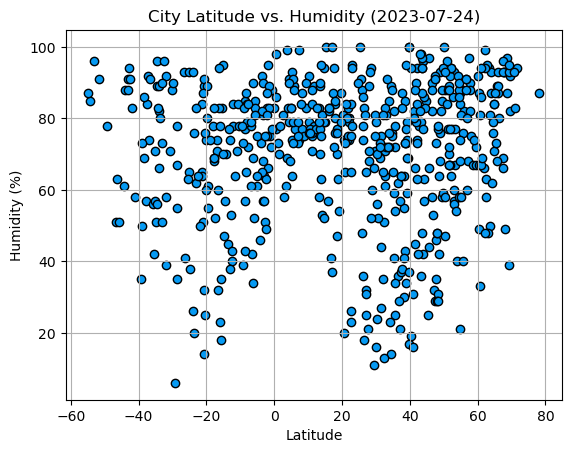

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Humidity"], facecolors = "#069AF3", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-24)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

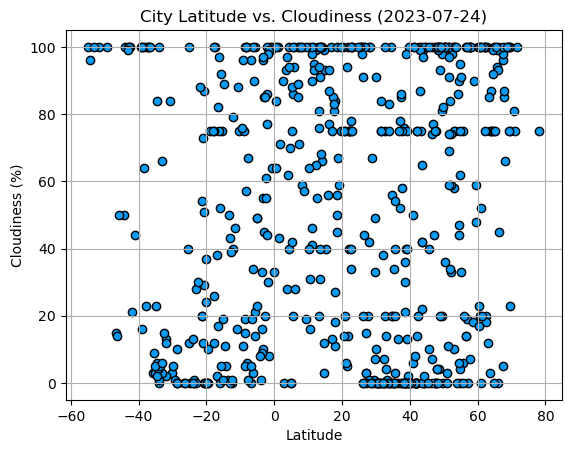

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Cloudiness"], facecolors = "#069AF3", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-07-24)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

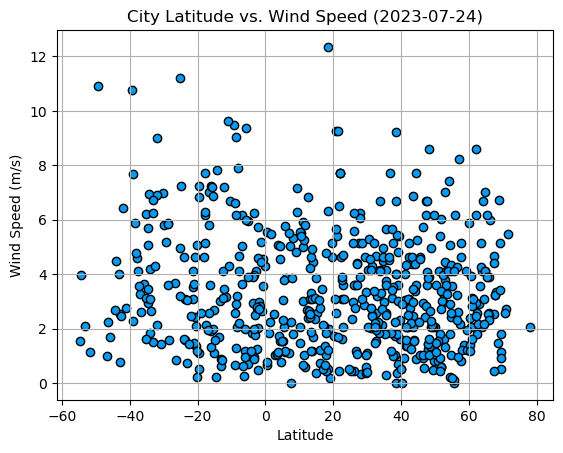

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.loc[:,"Lat"], city_data_df.loc[:,"Wind Speed"], facecolors = "#069AF3", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-07-24)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def regress_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    regress_plot.line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue}")

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dahlonega,34.5326,-83.9849,27.66,89,100,2.14,US,1692670688
4,nar'yan-mar,67.6713,53.0870,6.11,93,85,3.22,RU,1692670734
5,altay,47.8667,88.1167,22.30,35,0,1.24,CN,1692670783
6,klaksvik,62.2266,-6.5890,13.51,99,100,8.58,FO,1692670784
9,chaihe,44.7667,129.7000,23.61,85,100,5.24,CN,1692670785


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
regress_plot(northern_hemi_df.loc[:, "Lat"], northern_hemi_df.loc[:,"Max Temp"])
plt.annotate(regress_plot.line_eq,(2,4),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere")
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df.loc[:, "Lat"], southern_hemi_df.loc[:,"Max Temp"])
plt.annotate(regress_plot.line_eq,(-25,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
regress_plot(northern_hemi_df.loc[:, "Lat"], northern_hemi_df.loc[:,"Humidity"])
plt.annotate(regress_plot.line_eq,(45,6),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere")
plt.show()

In [ ]:
# Southern Hemisphere
regress_plot(southern_hemi_df.loc[:, "Lat"], southern_hemi_df.loc[:,"Humidity"])
plt.annotate(regress_plot.line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** By comparing the scatter plots of Humidity versus Latitude, we observe that there is a weak correlation between the two values.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
regress_plot(northern_hemi_df.loc[:, "Lat"], northern_hemi_df.loc[:,"Cloudiness"])
plt.annotate(regress_plot.line_eq,(2,4),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere")
plt.show()

In [ ]:
# Southern Hemisphere
regress_plot(southern_hemi_df.loc[:, "Lat"], southern_hemi_df.loc[:,"Cloudiness"])
plt.annotate(regress_plot.line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** When comparing the scatter plots of Cloudiness versus Latitude, it is observed that there is a weak correlation with very little correlation in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
regress_plot(northern_hemi_df.loc[:, "Lat"], northern_hemi_df.loc[:,"Wind Speed"])
plt.annotate(regress_plot.line_eq,(30,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere")
plt.show()

In [ ]:
# Southern Hemisphere
regress_plot(southern_hemi_df.loc[:, "Lat"], southern_hemi_df.loc[:,"Wind Speed"])
plt.annotate(regress_plot.line_eq,(-30,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** When looking at the scatter plots for wind speed and latitude, there is once again a weak correlation between the two values. There is almost no correlation in the southern hemisphere. 